## **Banking Customer Churn Prediction**

![logo](images/logo.jpg)

### **Elementos do grupo**

Grupo A2_42

| Nome | E-mail |
|-|-|
| António Marujo Rama | up202108801@up.pt |
| Manuel Ramos Leite Carvalho Neto | up202108782@up.pt |
| Matilde Isabel da Silva Simões | up202108782@up.pt |


### **Introdução**

O objetivo deste projeto é prever a probabilidade de um cliente terminar a sua ligação com o banco. Para tal, foi utilizado um dataset disponibilizado no Kaggle (https://www.kaggle.com/datasets/saurabhbadole/bank-customer-churn-prediction-dataset), que contém informações sobre os clientes, como o saldo, o número de produtos que o cliente possui, entre outros. 

Para a realização deste projeto foi utilizada a linguagem de programação Python, com a biblioteca Pandas para a manipulação dos dados e a biblioteca Matplotlib para a visualização dos dados.

### **Estrutura do projeto**

O projeto está organizado da seguinte forma:

**BankPrediction.ipynb**: Notebook Jupyter com o código desenvolvido para a análise e previsão do abandono do banco por parte dos clientes.

**Churn_Modelling.csv**: Dataset utilizado no projeto.

**images**: Pasta com as imagens utilizadas no notebook.

### **Instalação das bibliotecas necessárias**

Para executar o código presente no notebook, é necessário instalar as seguintes bibliotecas:

```bash
pip install pandas
pip install matplotlib
pip install seaborn
```

### **Dataset**

O dataset utilizado contém 10000 entradas e 14 colunas. As colunas são as seguintes:

1. **RowNumber**: número da linha (único 1-10000)
2. **CustomerId**: identificação do cliente (único 15.6m-15.8m)
3. **Surname**: nome do cliente 
4. **CreditScore**: pontuação do crédito (350-850)
5. **Geography**: país de origem (France, Spain, Germany)
6. **Gender**: género (Male, Female)
7. **Age**: idade (18-92)
8. **Tenure**: duração do uso do cartão de crédito (0-10)
9. **Balance**: saldo do cartão de crédito (0-251k)
10. **NumOfProducts**: número de produtos (1-4)
11. **HasCrCard**: tem cartão de crédito? (0 que corresponde a falso, 1 que corresponde a verdadeiro)
12. **IsActiveMember**: é membro ativo? (0 que corresponde a falso, 1 que corresponde a verdadeiro)
13. **EstimatedSalary**: salário estimado (11k-199k)
14. **Exited**: abandonou o banco? (0 que corresponde a falso, 1 que corresponde a verdadeiro)

### **Problema**

O problema consiste em prever se um cliente vai abandonar o banco, baseando o resultado na análise e na perceção da distribuição de dados e relação entre as variáveis do dataset mencionado no ponto anterior. Traduz-se, então, numa classificação binária (abandonar/não abandonar).


### **Objetivos**

// acho que é preciso por causa dos pontos do prof mas não sei bem o que meter (mais do mesmo??)


### **Compreender os dados**

Para começar, é necessário ler o dataset para se perceber a sua distribuição e estrutura. De seguida, vão ser realizados alguns testes para avaliar a integridade e qualidade dos dados.

In [21]:
import pandas as pds

dataframe = pds.read_csv('./Churn_Modelling.csv');

# dá print das primeiras 5 linhas do dataframe
dataframe.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Assim, com a função da biblioteca Pandas, verifica-se a existência de outliers, que podem ser erros ou valores atípicos verdadeiros. Para tal, é feita uma análise estatística descritiva dos dados, que inclui a média, o desvio padrão, o mínimo, o máximo, entre outros. Com a tabela abaixo, podemos concluir que não existem outliers nas colunas numéricas.

In [22]:
dataframe.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Na célula seguinte, é possível visualizar a verificação da existência de valores nulos/em falta. Caso existam, é necessário tratá-los, uma vez que podem influenciar o resultado final. No caso do dataset em questão, não existem valores nulos.

In [23]:
dataframe.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Já nesta célula, é possível observar quantos valores únicos existem em cada tabela. Este passo é importante para perceber se existem colunas que não são relevantes para a análise. No caso do dataset em questão, as colunas "RowNumber", "CustomerId" e "Surname" não são relevantes, uma vez que não influenciam a decisão de um cliente abandonar o banco. Assim, estas colunas vão ser eliminadas.

In [24]:
dataframe.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [25]:
# remover a coluna RowNumber, CustomerId e Surname
cleanDataframe = dataframe.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

# print das primeiras 5 linhas do dataframe limpo
cleanDataframe.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


O passo seguinte é confirmar se todos os tipos de dados das colunas são apropriados (por exemplo, numéricos para quantidades, categóricos para classificações). Caso não estejam, é necessário fazer a conversão para o tipo de dados correto. 

- CreditScore (int64): é um tipo de dados inteiro de 64 bits, o que é adequado para pontuações de crédito, que são normalmente quantitativos contínuos.
- Geography (object): 'object' em Pandas é um tipo de dado que contém strings, tornando-se adequado para dados categóricos como os nomes dos países.
- Gender (object): semelhante a 'Geography', este tipo é apropriado para dados categóricos ("Male" e "Female").
- Age (int64): é um tipo de dados inteiro de 64 bits, o que é adequado para idades, que são quantitativos contínuos.
- Tenure (int64): é um tipo de dados inteiro de 64 bits, o que é adequado para durações de tempo, que são quantitativos contínuos.
- Balance (float64): é um tipo de dados de ponto flutuante de 64 bits, o que é adequado para saldos, que são quantitativos contínuos.
- NumOfProducts (int64): é um tipo de dados inteiro de 64 bits, o que é adequado para números de produtos, que são quantitativos discretos.
- HasCrCard (int64): é um tipo de dados inteiro de 64 bits, o que é adequado para dados binários (0 e 1).
- IsActiveMember (int64): é um tipo de dados inteiro de 64 bits, o que é adequado para dados binários (0 e 1).
- EstimatedSalary (float64): é um tipo de dados de ponto flutuante de 64 bits, o que é adequado para salários, que são quantitativos contínuos.
- Exited (int64): é um tipo de dados inteiro de 64 bits, o que é adequado para dados binários (0 e 1).

In [26]:
cleanDataframe.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Assim, tendo em conta que só duas colunas (Gender e Geography) são categóricas, é necessário fazer a conversão para dados numéricos, de forma a que os dados sejam todos do mesmo tipo, facilitando a análise.

In [27]:
pds.set_option('future.no_silent_downcasting', True)

numDataframe = cleanDataframe.copy()

gender_map = {'Male': 0, 'Female': 1}
numDataframe['Gender'] = numDataframe['Gender'].replace(gender_map).astype('int64')

geography_map = {'France': 0, 'Spain': 1, 'Germany': 2}
numDataframe['Geography'] = numDataframe['Geography'].replace(geography_map).astype('int64')

numDataframe.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,1,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,1,1,43,2,125510.82,1,1,1,79084.10,0


In [28]:
numDataframe.dtypes

CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

### **Explorar os dados**

Para explorar os dados, é necessário perceber a distribuição de cada variável. Para tal, é possível utilizar gráficos, como histogramas.

No caso do dataset em questão, realizando uma análise superficial, a maioria dos clientes é de França, do género masculino e não abandonaram o banco. Também conseguimos observar que a predominância tem um cartão de crédito e é membro ativo. A faixa etária mais comum é entre 20 e 50 anos, o número de produtos é, maioritariamente, 1 ou 2 produtos e a duração de uso do cartão de crédito entre 1 e 9 anos.

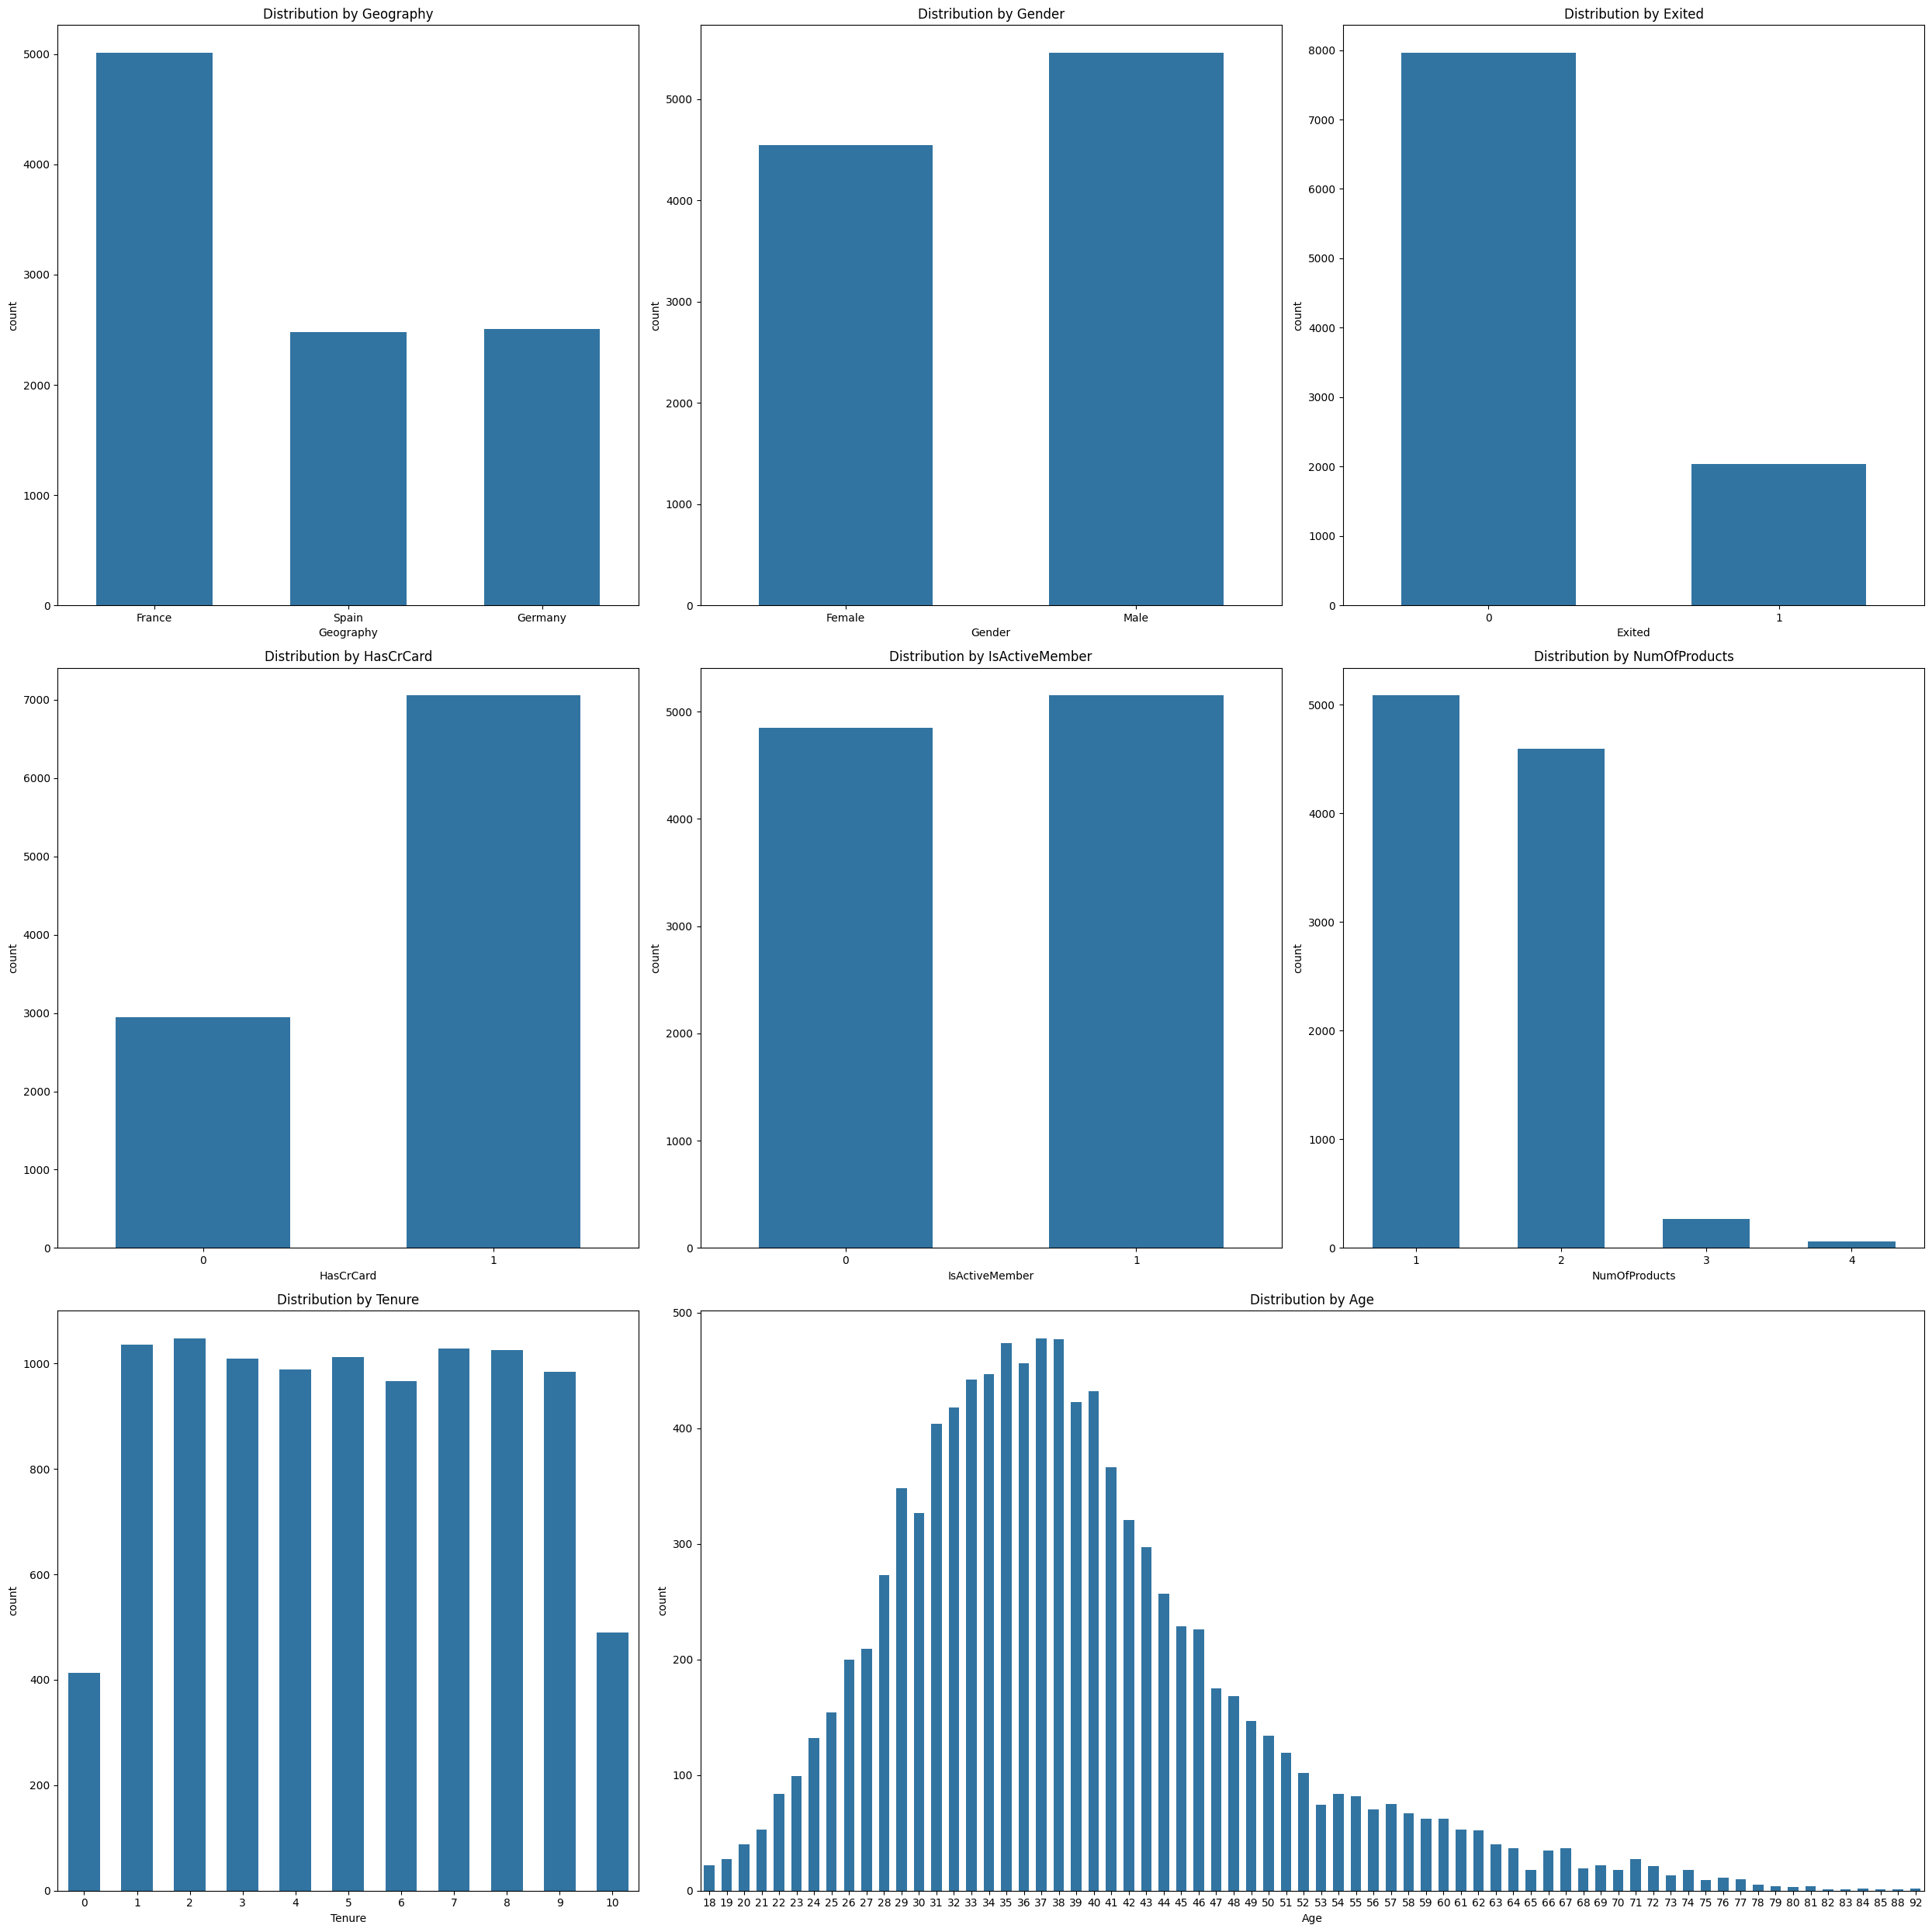

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(25, 25)) 

plt.subplot(3, 3, 1) 
sns.countplot(x='Geography', data=cleanDataframe, width=0.6)
plt.title('Distribution by Geography')

plt.subplot(3, 3, 2)
sns.countplot(x='Gender', data=cleanDataframe, width=0.6)
plt.title('Distribution by Gender')

plt.subplot(3, 3, 3)
sns.countplot(x='Exited', data=cleanDataframe, width=0.6)
plt.title('Distribution by Exited')

plt.subplot(3, 3, 4) 
sns.countplot(x='HasCrCard', data=cleanDataframe, width=0.6)
plt.title('Distribution by HasCrCard')

plt.subplot(3, 3, 5)
sns.countplot(x='IsActiveMember', data=cleanDataframe, width=0.6)
plt.title('Distribution by IsActiveMember')

plt.subplot(3, 3, 6)
sns.countplot(x='NumOfProducts', data=cleanDataframe, width=0.6)
plt.title('Distribution by NumOfProducts')

plt.subplot(3, 3, 7)
sns.countplot(x='Tenure', data=cleanDataframe, width=0.6)
plt.title('Distribution by Tenure')

plt.subplot(3, 3, (8,9))
sns.countplot(x='Age', data=cleanDataframe, width=0.6)
plt.title('Distribution by Age')

plt.tight_layout()
plt.show()
